In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import seaborn as sns
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [3]:
dataset = pd.read_csv("water-treatment-data.csv",na_values="?" )

In [4]:
dataset

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,D-29/8/91,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      527 non-null    object 
 1   Q-E       509 non-null    float64
 2   ZN-E      524 non-null    float64
 3   PH-E      527 non-null    float64
 4   DBO-E     504 non-null    float64
 5   DQO-E     521 non-null    float64
 6   SS-E      526 non-null    float64
 7   SSV-E     516 non-null    float64
 8   SED-E     502 non-null    float64
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     487 non-null    float64
 12  SS-P      527 non-null    int64  
 13  SSV-P     516 non-null    float64
 14  SED-P     503 non-null    float64
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     499 non-null    float64
 18  DQO-D     518 non-null    float64
 19  SS-D      525 non-null    float64
 20  SSV-D     514 non-null    float6

In [6]:
dataset.isna().sum()

Date         0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [7]:
dataset.describe().T.style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
Q-E,509.0,"37,226.6","6,636.0","10,050.0","32,888.0","35,990.0","41,372.0","60,081.0"
ZN-E,524.0,2.4,2.7,0.1,0.9,1.5,3.0,33.5
PH-E,527.0,7.8,0.2,6.9,7.6,7.8,8.0,8.7
DBO-E,504.0,188.7,62.1,31.0,146.8,182.5,223.0,438.0
DQO-E,521.0,406.9,120.4,81.0,325.0,400.0,478.0,941.0
SS-E,526.0,227.4,135.9,98.0,170.0,196.0,242.0,"2,008.0"
SSV-E,516.0,61.4,12.4,13.2,55.7,64.3,69.7,85.0
SED-E,502.0,4.6,2.7,0.4,3.1,4.5,5.5,36.0
COND-E,527.0,"1,478.6",394.9,651.0,"1,201.0","1,406.0","1,672.0","3,230.0"
PH-P,527.0,7.8,0.2,7.3,7.7,7.8,8.0,8.5


In [11]:
print(dataset.columns)


Index(['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')


In [12]:
id_null_flow = dataset.loc[dataset['Q-E'].isnull(), :].index
id_null_flow

Int64Index([436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
            449, 450, 451, 452, 453],
           dtype='int64')

In [13]:
df = dataset.copy()

# Change column headings type to sting. String types required by Seaborn.
df.columns = dataset.columns.astype(str)

In [16]:
#Drop any null in the plant inflow columnds
dataset.dropna(axis=0,how='any',subset=['Q-E'],inplace=True)

In [17]:
dataset.isna().sum()

Date         0
Q-E          0
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        7
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    24
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_15404\1751134740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


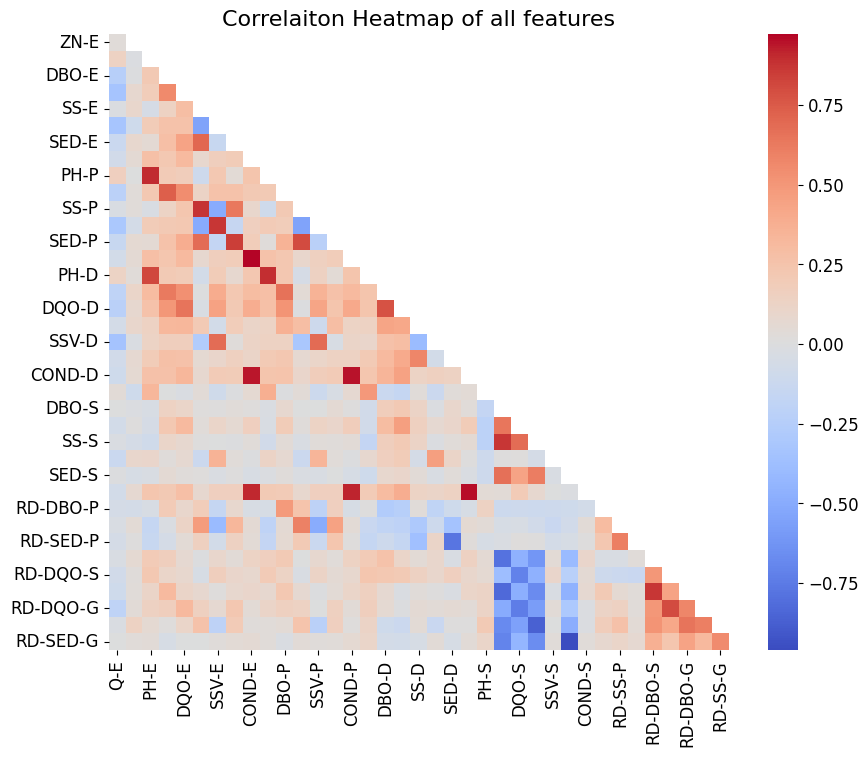

In [19]:
# Review any potential correlation between attributes
corr_mat=df.corr()
mask=np.tril(np.ones_like(corr_mat,dtype=np.bool8),k=-1)

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')

plt.title('Correlaiton Heatmap of all features', fontsize=16)
plt.savefig('correlation_heatmap_all_features.png',dpi=300)
plt.show()

## Features

Reading from left to right on the x-axis, will go up to see what is strong or weak correlation to other attributes.

Will use these correlations as a basis to potential drop unnecessary attributes.

* 1 Q-E has minimal correlation to all the others. But this is the main feature of the plant.
* 2 ZN-E has minimal correlations also. Since Zn is not measured again I will drop it.
* 3 PH-E has high correlation with 10 PH-P, 16 PH-D and 23 PH-S. The PH doesn't change much from the influent to the effluent.
* 9 COND-E has high correlation with 15 COND-P, 22 COND-D and 29 COND-S. The conductivity is remains similar throughout the plant.

In [20]:
# Assign feature data

# Select those features (columns) which may be useful 
x = np.r_[1, 4:9, 11:15, 17:22, 24:29]#, 30:39]

X = dataset.iloc[:, x].values
print(f"Attribute numbers to keep: {x}")

Attribute numbers to keep: [ 1  4  5  6  7  8 11 12 13 14 17 18 19 20 21 24 25 26 27 28]


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_15404\2036296816.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)


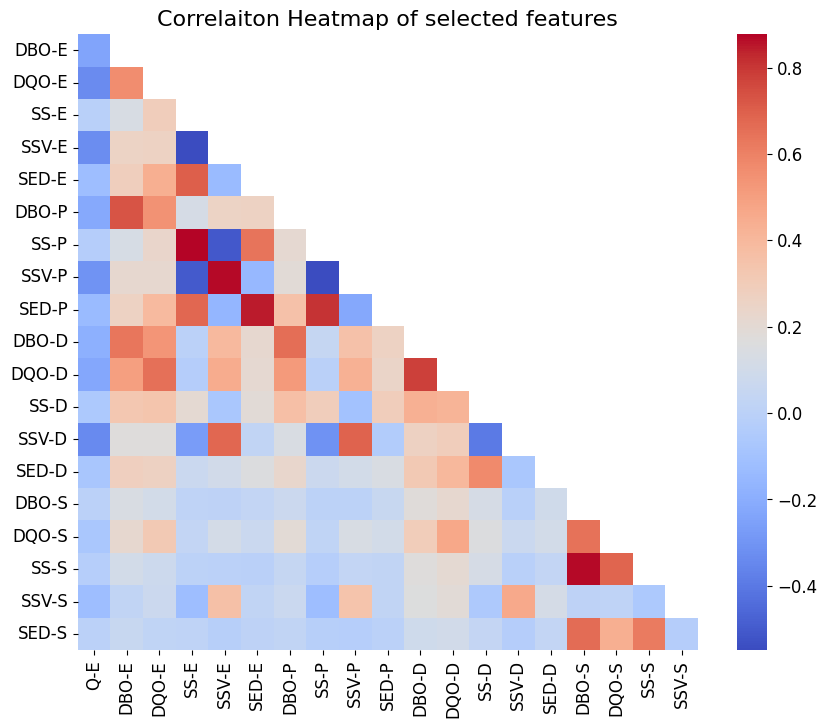

In [21]:
# Review if any potential correlations between attributes
corr_mat = df.iloc[:, x].corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k=-1)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')

plt.title('Correlaiton Heatmap of selected features', fontsize=16)
plt.savefig('correlation_heatmap_select_features')

plt.show()

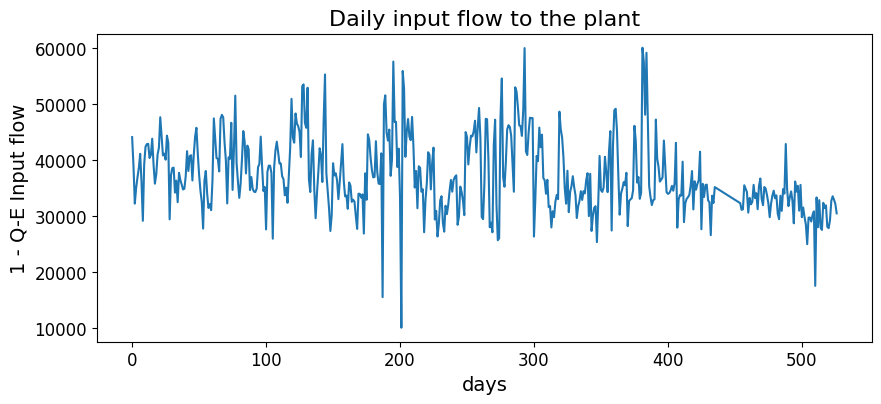

In [22]:
# Line chart of the Input Flow into the plant
plt.figure(figsize=(10,4))
plt.title("Daily input flow to the plant", fontsize=16)
plt.xlabel("days", fontsize=14)
plt.ylabel("1 - Q-E Input flow", fontsize=14)
sns.lineplot(data=df.iloc[:, 1])
plt.savefig('daily_input_flow_to_plant')

In [23]:
from sklearn.impute import SimpleImputer

# Replace null values with the mean of the column
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)

In [24]:
from sklearn.preprocessing import StandardScaler

# Large variation from plant input values to other values, therefore scale all data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
max_num_clusters = 9 # Assign a number and amend to suit
kmeans_per_k = [KMeans(n_clusters=k, init= 'k-means++', random_state=0).fit(X) 
                for k in range(1,max_num_clusters)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

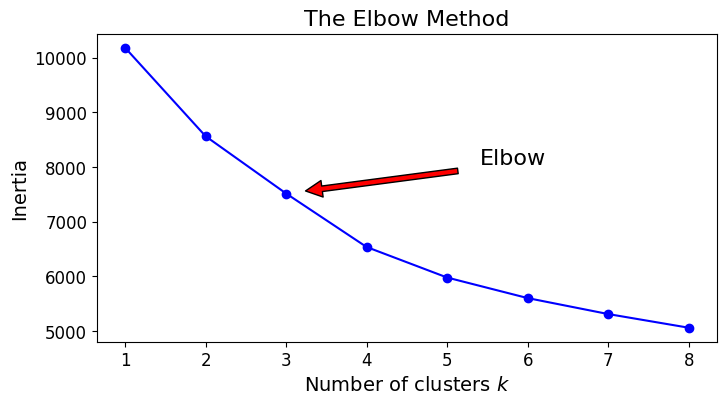

In [27]:
plt.figure(figsize=(8,4))
plt.plot(range(1,max_num_clusters), inertias, "bo-")
plt.title("The Elbow Method", fontsize=16)
plt.xlabel("Number of clusters $k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
elbow_tick = 3  # number of clusters where the elbow is located
plt.annotate("Elbow",
             xy = (elbow_tick, inertias[elbow_tick - 1]),
             xytext = (0.6, 0.6),
             textcoords = 'figure fraction',
             fontsize = 16,
             arrowprops = dict(facecolor='red', shrink=0.1)
            )
plt.savefig("inertia_vs_k_plot_elblow_plot")
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, init= 'k-means++', random_state=0).fit(X) 
                for k in range(1,max_num_clusters + 1)]
silhouette_score_per_k = [silhouette_score(X, model.labels_)
                            for model in kmeans_per_k[1:]]

c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

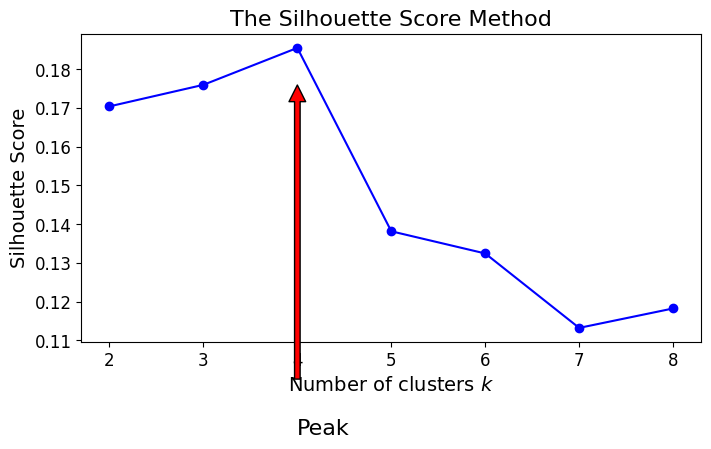

In [30]:
max_silhouette_index = np.argmax(silhouette_score_per_k)

# Create the figure
plt.figure(figsize=(8, 4))

# Plot the silhouette scores
plt.plot(range(2, max_num_clusters), silhouette_score_per_k[:-1], "bo-")

# Add title and labels
plt.title('The Silhouette Score Method', fontsize=16)
plt.xlabel("Number of clusters $k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)

# Annotate the peak
plt.annotate("Peak",
             xy=(max_silhouette_index + 2, silhouette_score_per_k[max_silhouette_index]),
             xytext=(max_silhouette_index + 2, silhouette_score_per_k[max_silhouette_index] - 0.1),
             textcoords='data',
             fontsize=16,
             arrowprops=dict(facecolor='red', shrink=0.1)
            )

# Save the plot as a PNG file
plt.savefig("silhouette_score_vs_k_plot.png")

# Show the plot
plt.show()

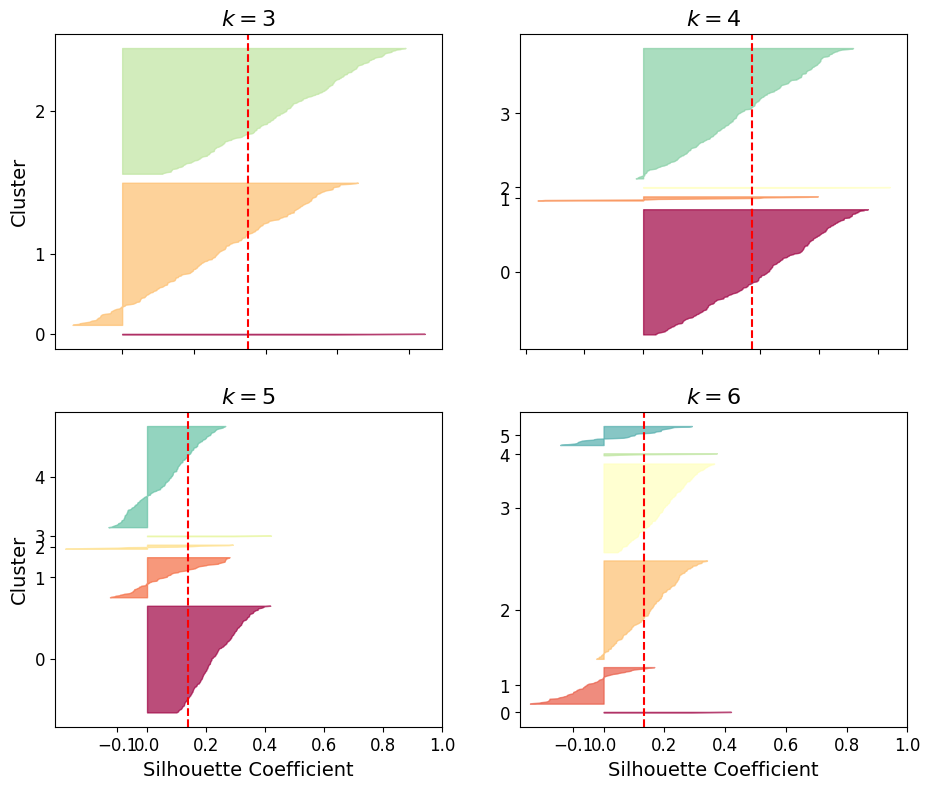

In [31]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score_per_k[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.savefig("silhouette_analysis_plot")
plt.show()

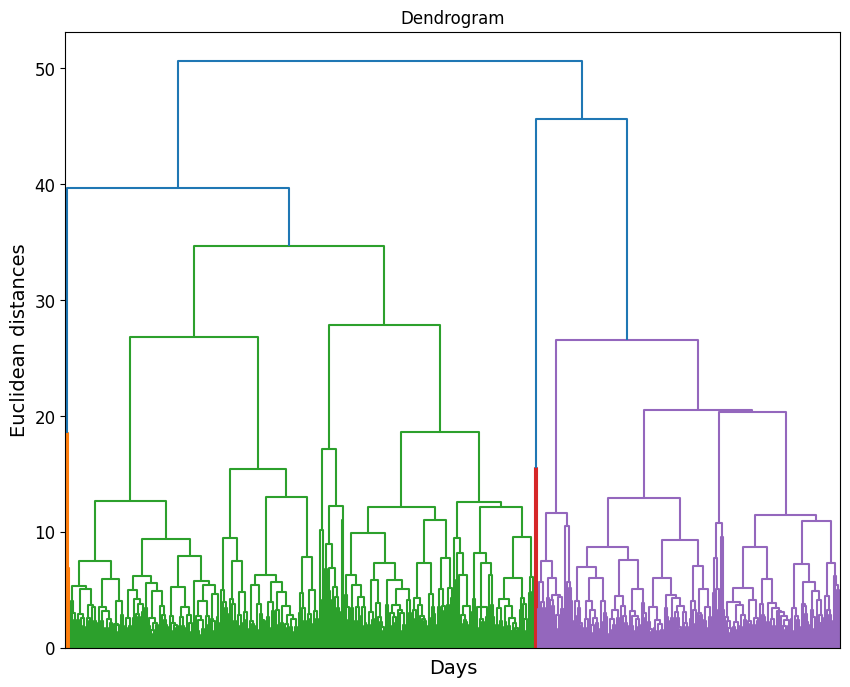

In [33]:
# Using the dendrogram to find the optimal number of clusters
# Measure to find the maximum vertical distance between horizontal
# lines. The highest y value crosses N number of vertical lines = clusters.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 8))

plt.rcParams['axes.grid'] = False
plt.title('Dendrogram')
plt.xlabel('Days')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), no_labels=True)
plt.savefig('dendogram')
plt.show()

In [34]:
# Training the K-Means model on the dataset

# Review the elbow plot, Silhouette plots, and Dendrogram and set the number of clusters.
n_clusters = 3

kmeans = KMeans(n_clusters= n_clusters, init= 'k-means++', random_state=0).fit(X)
y_kmeans = kmeans.fit_predict(X)

c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

c:\Users\Sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [36]:
# Select those features (columns) which may be useful 
perf = np.r_[30:39]

X_perf = dataset.iloc[:, perf].values
X_perf = imp.fit_transform(X_perf)
X_perf.shape

(509, 9)

In [37]:
column_labels = [str(i) for i in list(x)] + [str(i) for i in list(perf)] + ['39', '40']
column_labels

['1',
 '4',
 '5',
 '6',
 '7',
 '8',
 '11',
 '12',
 '13',
 '14',
 '17',
 '18',
 '19',
 '20',
 '21',
 '24',
 '25',
 '26',
 '27',
 '28',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40']

In [38]:
# Add the Date, KMeans and Agglomerative cluster predictions to the dataset
results = pd.DataFrame(data = np.concatenate(
                (
                # dataset.iloc[:, 0].values.reshape(len(dataset), 1),
                scaler.inverse_transform(X),
                X_perf,
                y_kmeans.reshape(len(y_kmeans), 1),
                y_hc.reshape(len(y_hc), 1)
                ),
                axis=1),
                columns=column_labels,
                dtype='float'
            )#.rename(columns={0: "Date", 39: "y_kmeans", 40:"y_hc"})

In [39]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       509 non-null    float64
 1   4       509 non-null    float64
 2   5       509 non-null    float64
 3   6       509 non-null    float64
 4   7       509 non-null    float64
 5   8       509 non-null    float64
 6   11      509 non-null    float64
 7   12      509 non-null    float64
 8   13      509 non-null    float64
 9   14      509 non-null    float64
 10  17      509 non-null    float64
 11  18      509 non-null    float64
 12  19      509 non-null    float64
 13  20      509 non-null    float64
 14  21      509 non-null    float64
 15  24      509 non-null    float64
 16  25      509 non-null    float64
 17  26      509 non-null    float64
 18  27      509 non-null    float64
 19  28      509 non-null    float64
 20  30      509 non-null    float64
 21  31      509 non-null    float64
 22  32

In [40]:
# K-Means Value counts
results['39'].value_counts()

1.0    269
2.0    238
0.0      2
Name: 39, dtype: int64

In [41]:
# Hierarchical Clustering Value Counts
results['40'].value_counts()

0.0    308
1.0    199
2.0      2
Name: 40, dtype: int64

In [42]:
# Clusting numbering predictions are random, therefore
# remap to assign both algorithms to cluster numbers based on value counts for 
# ease of comparison. 
y_kmeans_cluster_remap = {0:3, 1:2, 2:1}
y_hc_cluster_remap = {0:3, 1:2, 2:1}

results['39'] = results['39'].map(y_kmeans_cluster_remap)
results['40'] = results['40'].map(y_hc_cluster_remap)

In [43]:
# Confirm Agglomerative cluster 0 is for the smaller cluster size up to 2 for the largest cluster size
# inline with K-means value counts.
results['39'].value_counts()

2    269
1    238
3      2
Name: 39, dtype: int64

In [44]:
results['40'].value_counts()

3    308
2    199
1      2
Name: 40, dtype: int64

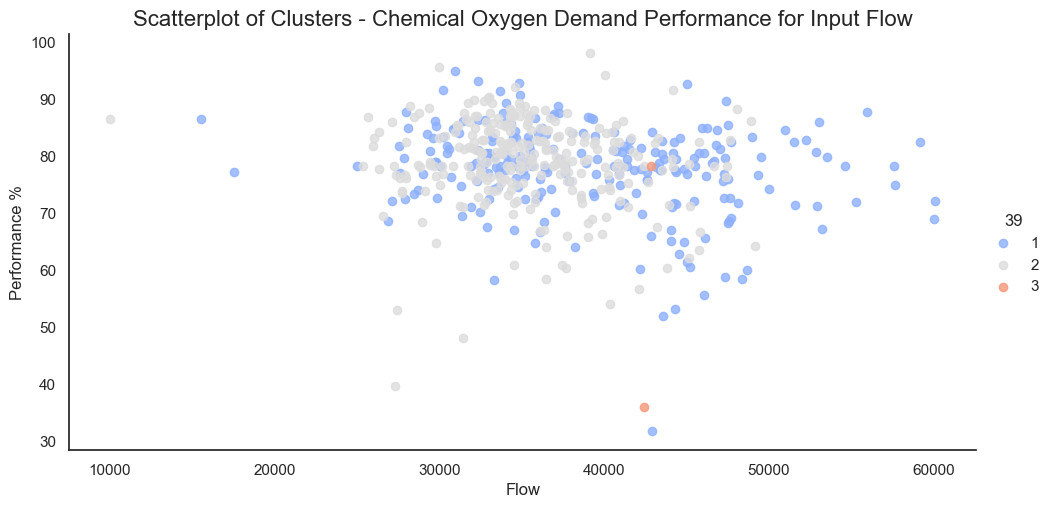

In [46]:
# Create a copy of the results dataset to work with
df_r = results.copy()

# Assign columns from RangeIndex to string as lmplot can only accept string values for column names
df_r.columns = df_r.columns.astype(str)
sns.set()
sns.set_style(style="white")

# Use the entire DataFrame as data and specify column names for x and y
g = sns.lmplot(x="1", y="36", data=df_r, hue="39", palette='coolwarm', height=5, aspect=2, fit_reg=False)
g = (g.set_axis_labels("Flow", "Performance %"))
plt.title("Scatterplot of Clusters - Chemical Oxygen Demand Performance for Input Flow", 
            fontsize=16)

# Show the plot

plt.savefig('scatterplot_cod_perf_input_clusters')
plt.show()

In [47]:
dataset.describe().T.style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
Q-E,509.0,"37,226.6","6,636.0","10,050.0","32,888.0","35,990.0","41,372.0","60,081.0"
ZN-E,506.0,2.4,2.8,0.1,0.9,1.5,3.0,33.5
PH-E,509.0,7.8,0.2,7.2,7.7,7.8,8.0,8.7
DBO-E,486.0,189.5,62.8,31.0,147.0,183.0,224.0,438.0
DQO-E,503.0,406.9,121.0,81.0,325.0,400.0,478.0,941.0
SS-E,508.0,228.1,138.0,98.0,170.0,196.0,242.0,"2,008.0"
SSV-E,498.0,61.3,12.6,13.2,55.7,64.3,69.9,85.0
SED-E,484.0,4.6,2.8,0.4,3.1,4.5,5.5,36.0
COND-E,509.0,"1,476.2",397.0,651.0,"1,200.0","1,403.0","1,672.0","3,230.0"
PH-P,509.0,7.8,0.2,7.3,7.7,7.8,8.0,8.5


In [50]:
agg_func = {'1' : ['count', 'mean', 'std'], '35': ['mean', 'std'], '36': ['mean', 'std']}
df_r.groupby(['39']).agg(agg_func).style.format('{0:,.2f}')

In [51]:
agg_func = {'1' : ['count', 'mean', 'std'], '35': ['mean', 'std'], '36': ['mean', 'std']}
df_r.groupby(['40']).agg(agg_func).style.format('{0:,.2f}')

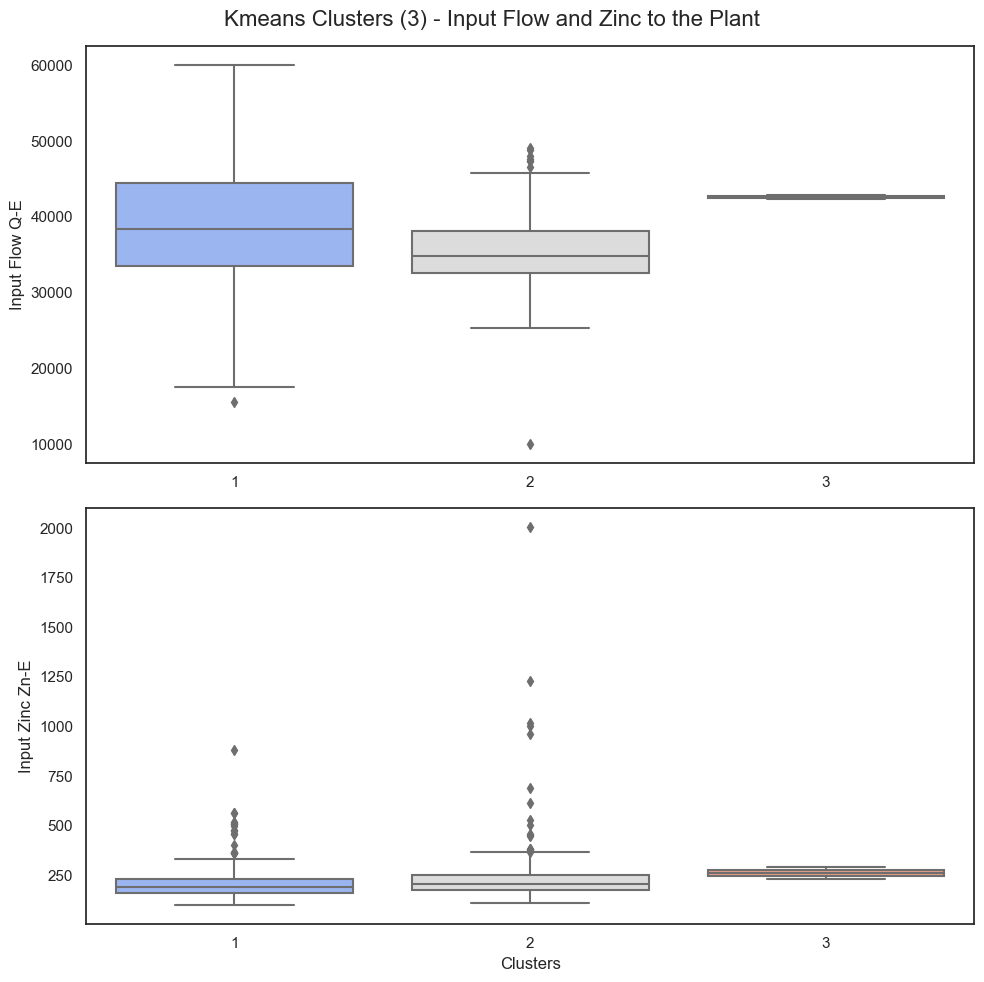

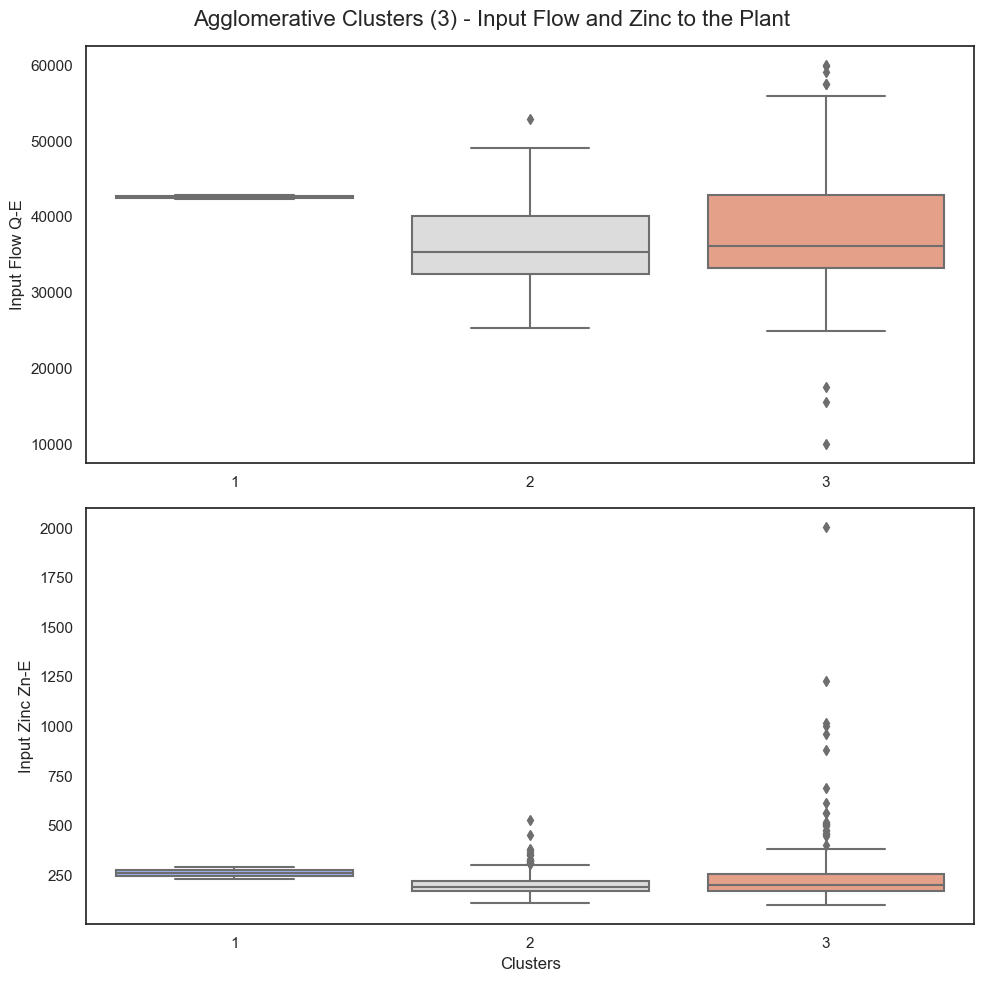

In [52]:
x_data_dict = {39: ['39', 'Kmeans'] , 40: ['40', 'Agglomerative']}
y_data = ['1', '6']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    plt.rcParams['axes.grid'] = False
    fig = plt.figure(figsize=(10, 10))
    
    sup_title = f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - "\
    "Input Flow and Zinc to the Plant"
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(211)
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)
    ax1.set_ylabel("Input Flow Q-E")
    ax1.set_xlabel("")
    
    ax2 = plt.subplot(212)
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)
    ax2.set_ylabel("Input Zinc Zn-E")
    ax2.set_xlabel("Clusters")
    plt.rcParams['axes.grid'] = True
    plt.tight_layout()
    plt.savefig(fig_name)

fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

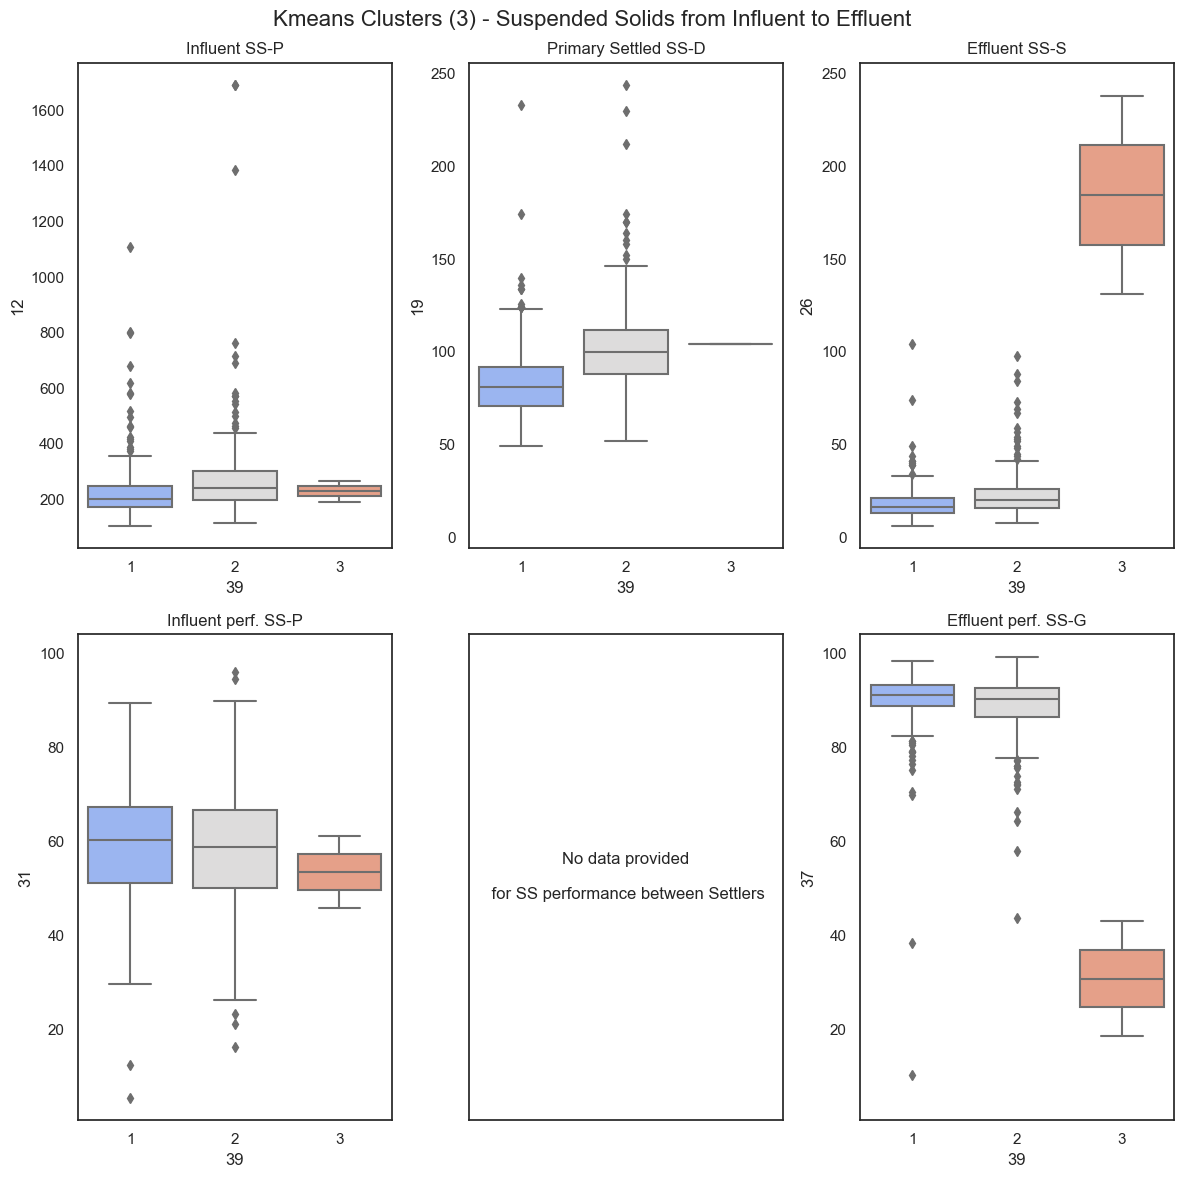

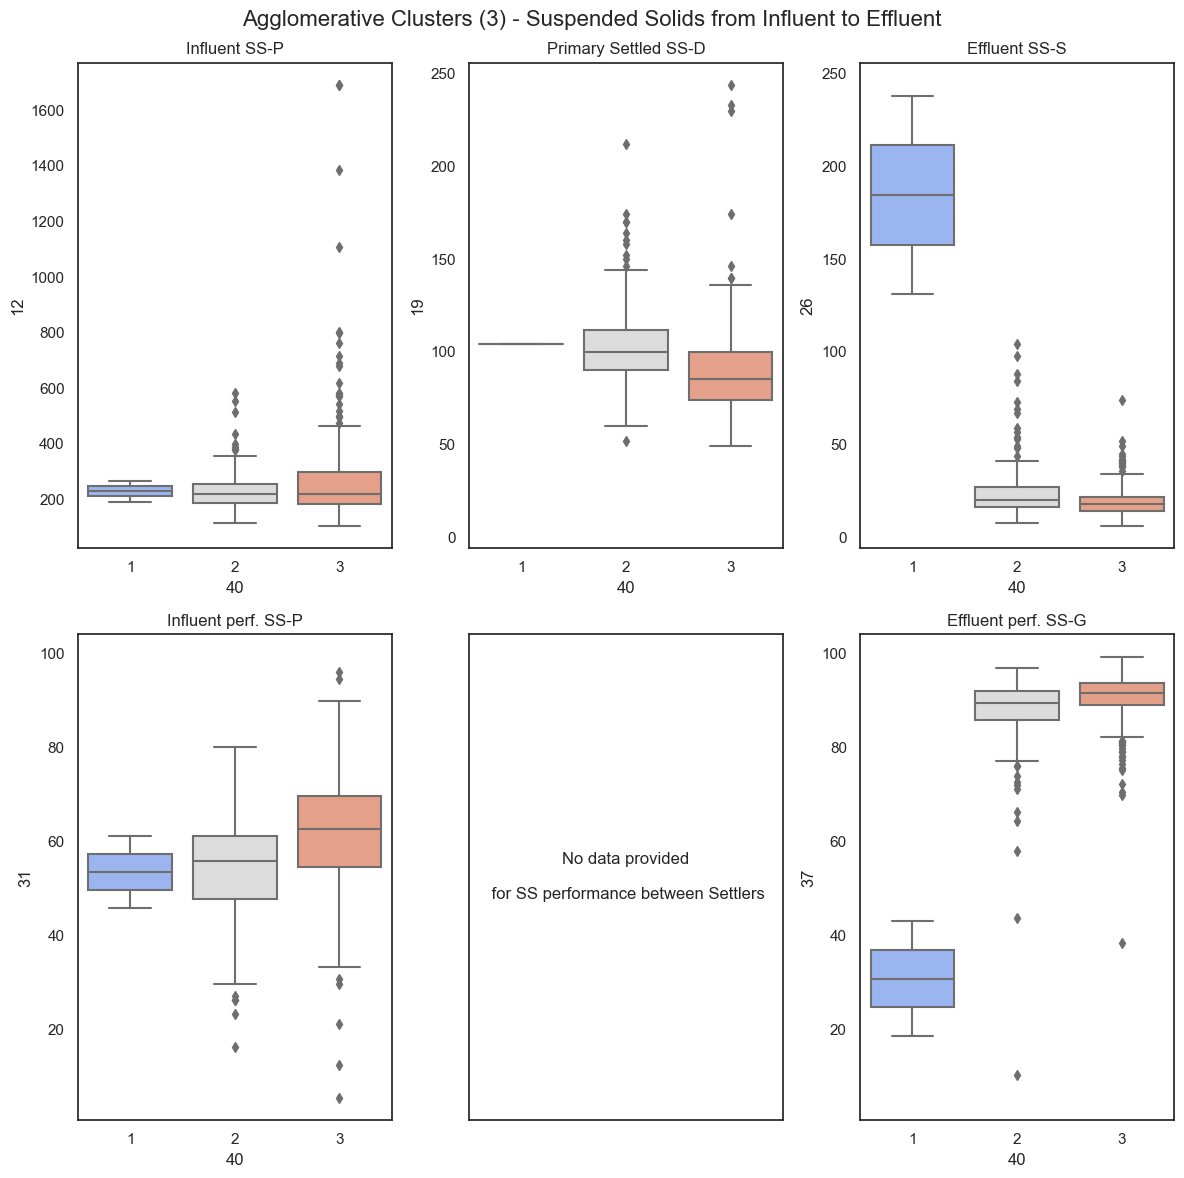

In [53]:
y_data = ['12', '19', '26', '31', '31', '37']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    fig = plt.figure(figsize=(12, 12))
    plt.rcParams['axes.grid'] = False

    sup_title = (f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Suspended Solids from Influent to Effluent")
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    ax1.set_title("Influent SS-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)
    

    ax2 = plt.subplot(232)
    ax2.set_title("Primary Settled SS-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)
    

    ax3 = plt.subplot(233, sharey=ax2)
    ax3.set_title("Effluent SS-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234)
    ax4.set_title("Influent perf. SS-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 3)

    ax5 = plt.subplot(235, xticks=[], yticks=[])
    ax5.text(0.5, 0.5, "No data provided\n\n for SS performance between Settlers", 
            horizontalalignment='center', verticalalignment='center')

    ax6 = plt.subplot(236, sharey=ax4)
    ax6.set_title("Effluent perf. SS-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    plt.savefig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

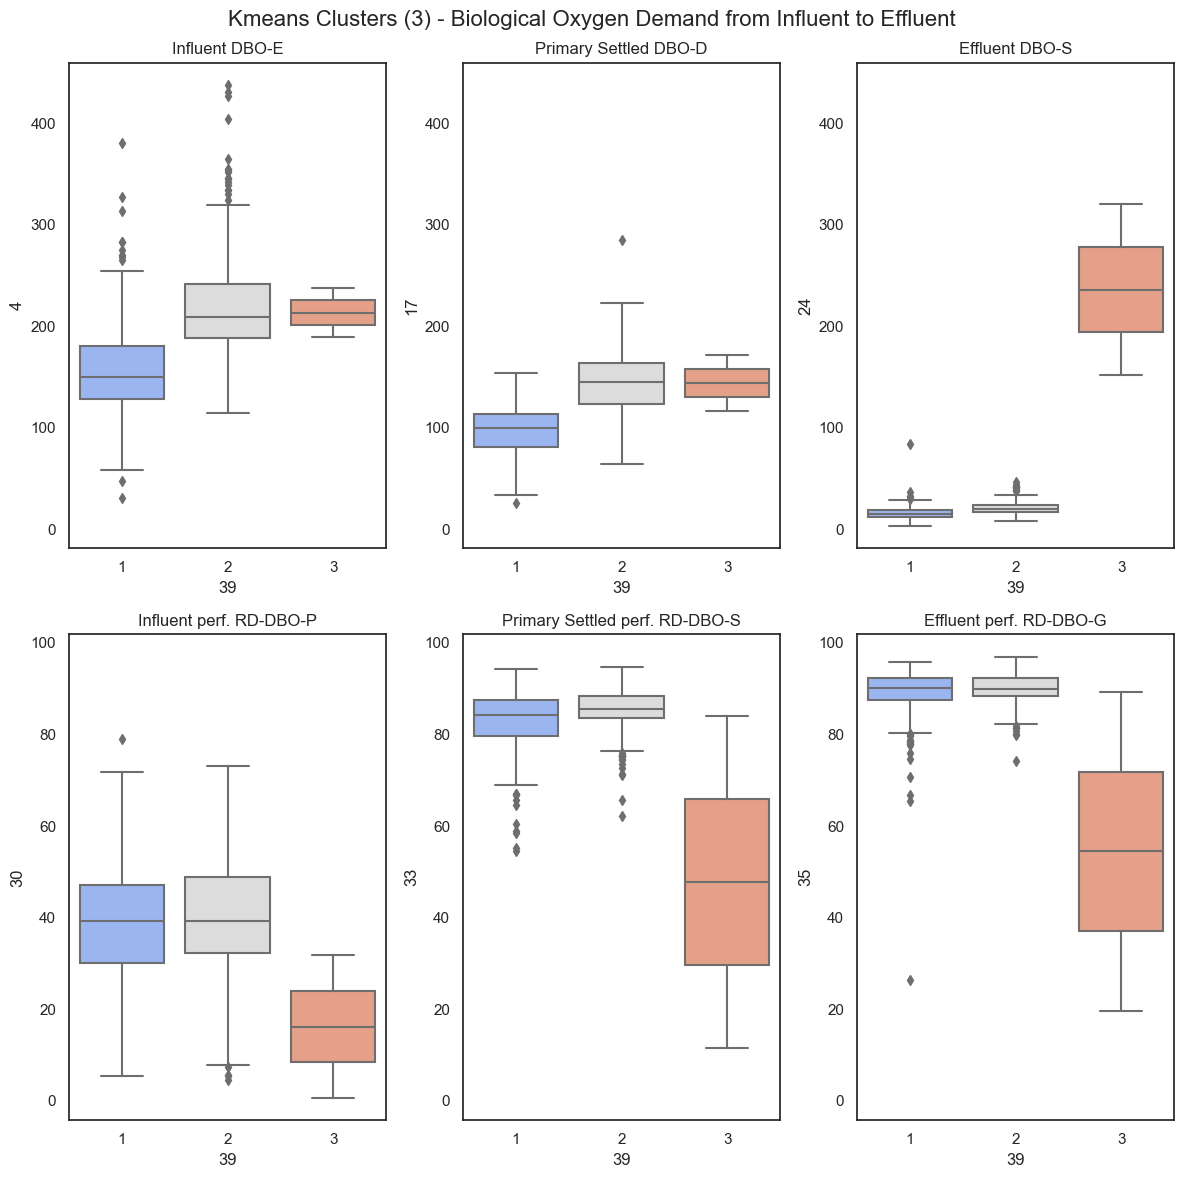

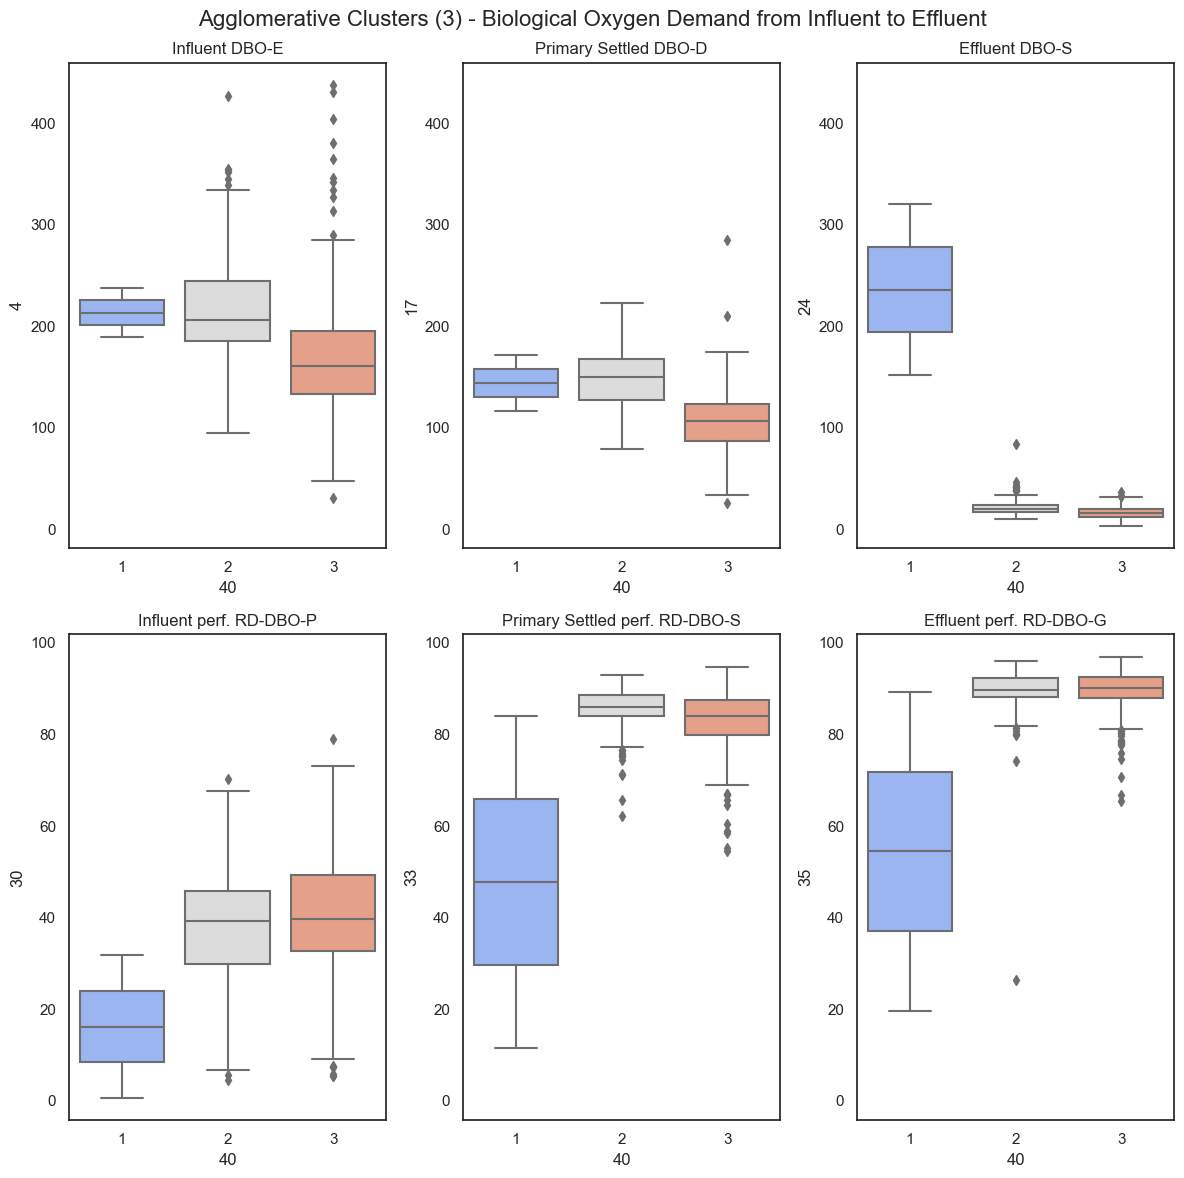

In [54]:
y_data = ['4', '17', '24', '30', '33', '35']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    plt.rcParams['axes.grid'] = False
    fig = plt.figure(figsize=(12, 12))
    
    sup_title = f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Biological Oxygen Demand from Influent to Effluent"
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    
    ax1.set_title("Influent DBO-E")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)

    ax2 = plt.subplot(232, sharey=ax1)
    ax2.set_title("Primary Settled DBO-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)

    ax3 = plt.subplot(233, sharey=ax1)
    ax3.set_title("Effluent DBO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234)
    ax4.set_title("Influent perf. RD-DBO-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 3)

    ax5 = plt.subplot(235, sharey=ax4)
    ax5.set_title("Primary Settled perf. RD-DBO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 4)

    ax6 = plt.subplot(236, sharey=ax4)
    ax6.set_title("Effluent perf. RD-DBO-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    plt.savefig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

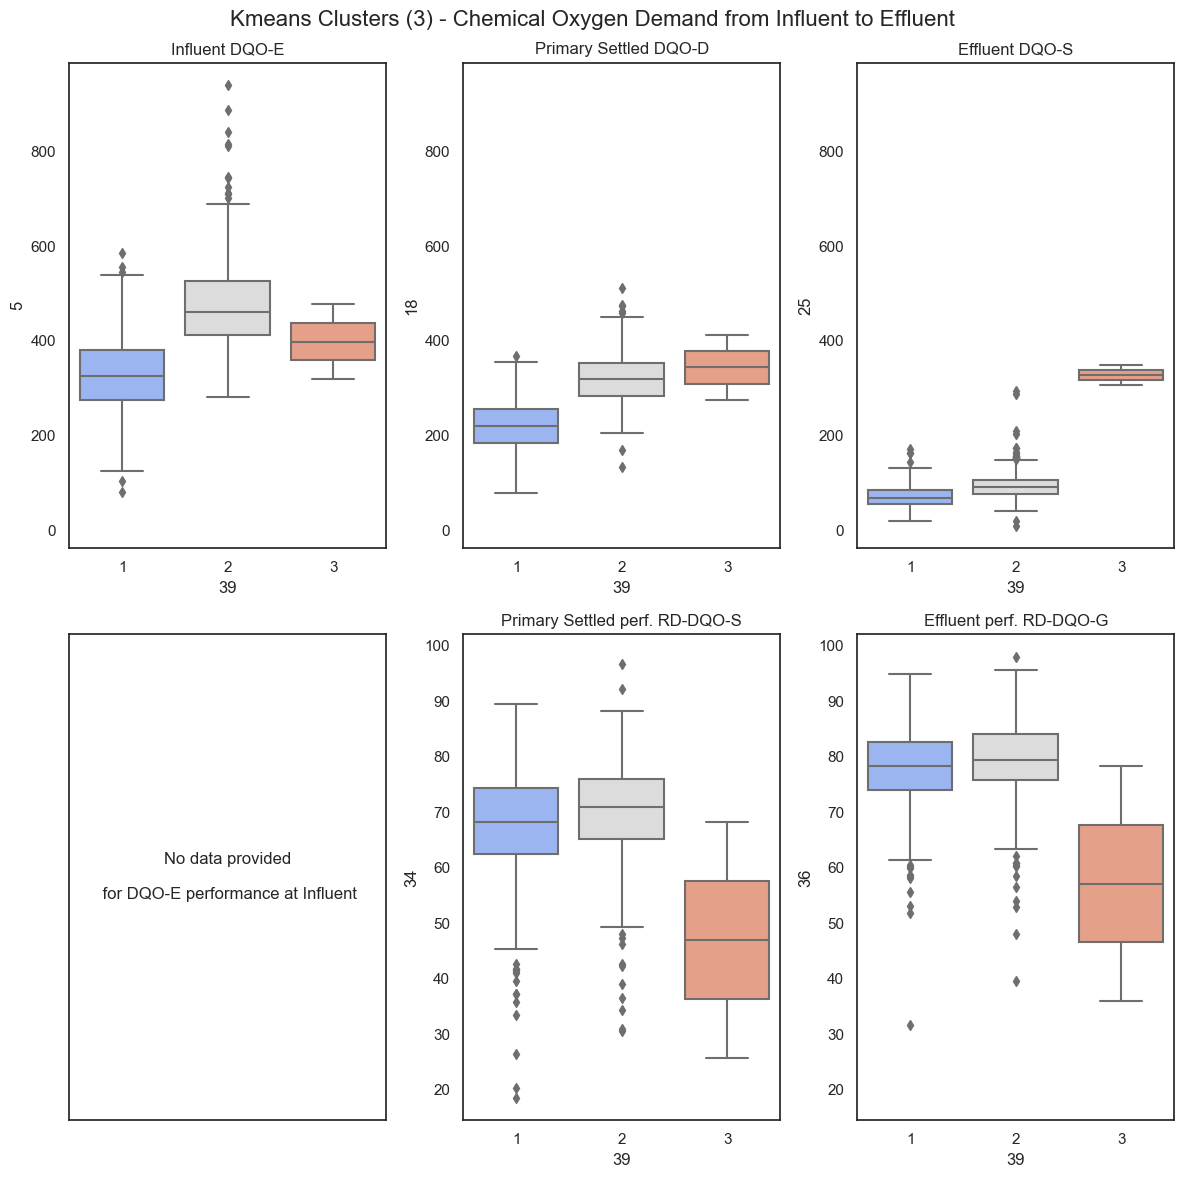

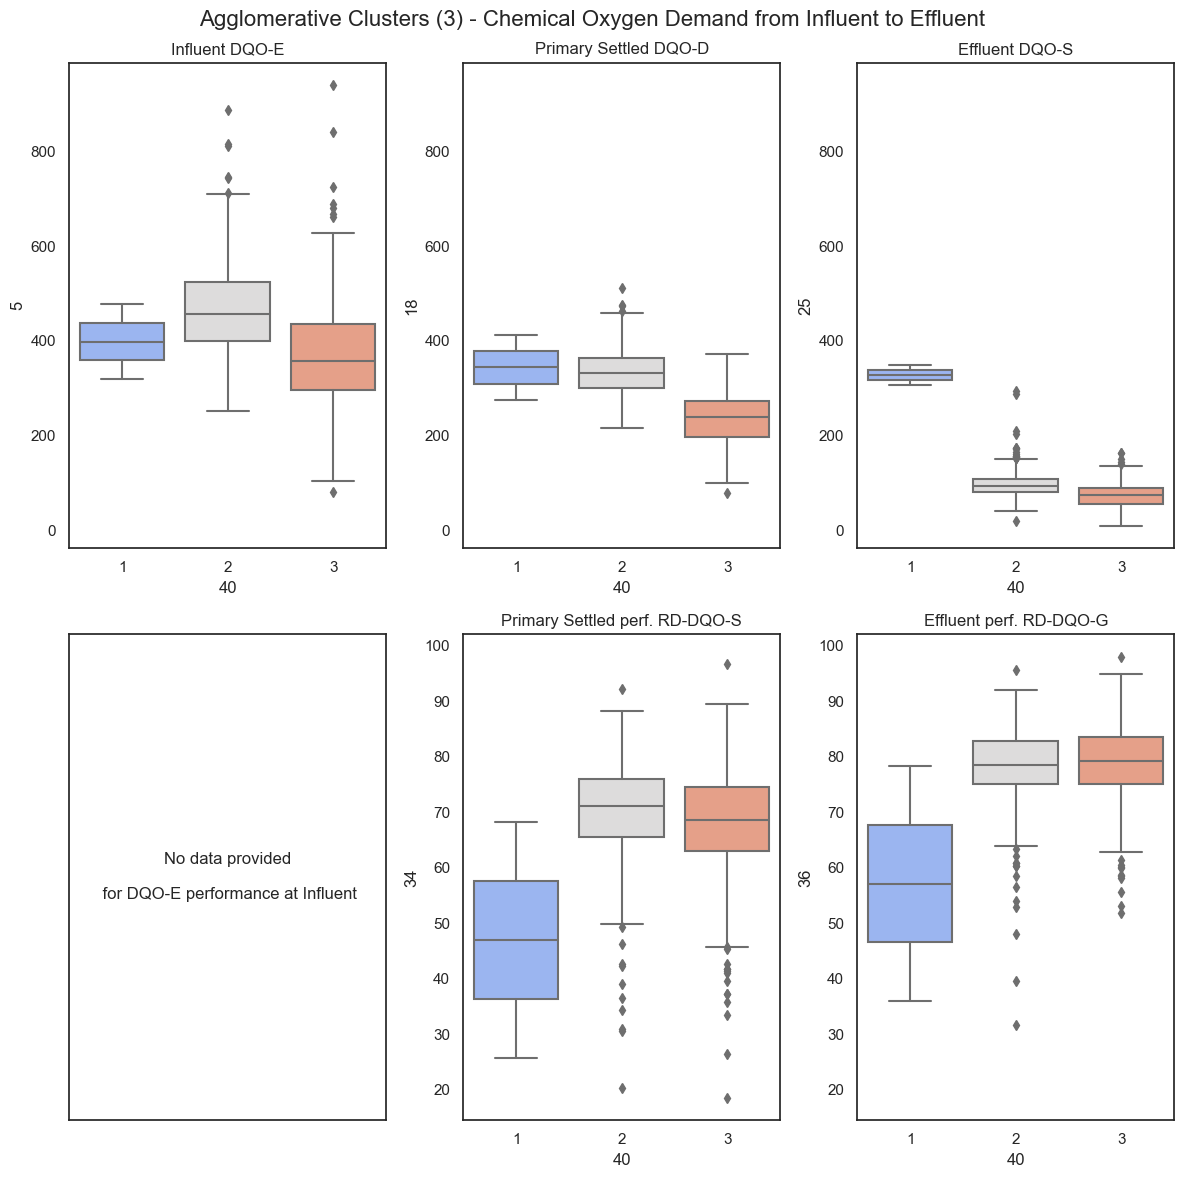

In [55]:
y_data = ['5', '18', '25', '', '34', '36']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    fig = plt.figure(figsize=(12, 12))
    plt.rcParams['axes.grid'] = False



    sup_title = (f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Chemical Oxygen Demand from Influent to Effluent")
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    ax1.set_title("Influent DQO-E")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)

    ax2 = plt.subplot(232, sharey=ax1)
    ax2.set_title("Primary Settled DQO-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)

    ax3 = plt.subplot(233, sharey=ax1)
    ax3.set_title("Effluent DQO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234, xticks=[], yticks=[])
    
    ax4.text(0.5, 0.5, "No data provided\n\n for DQO-E performance at Influent", 
            horizontalalignment='center', verticalalignment='center')

    ax5 = plt.subplot(235)
    ax5.set_title("Primary Settled perf. RD-DQO-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 4)

    ax6 = plt.subplot(236, sharey=ax5)
    ax6.set_title("Effluent perf. RD-DQO-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    plt.savefig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)

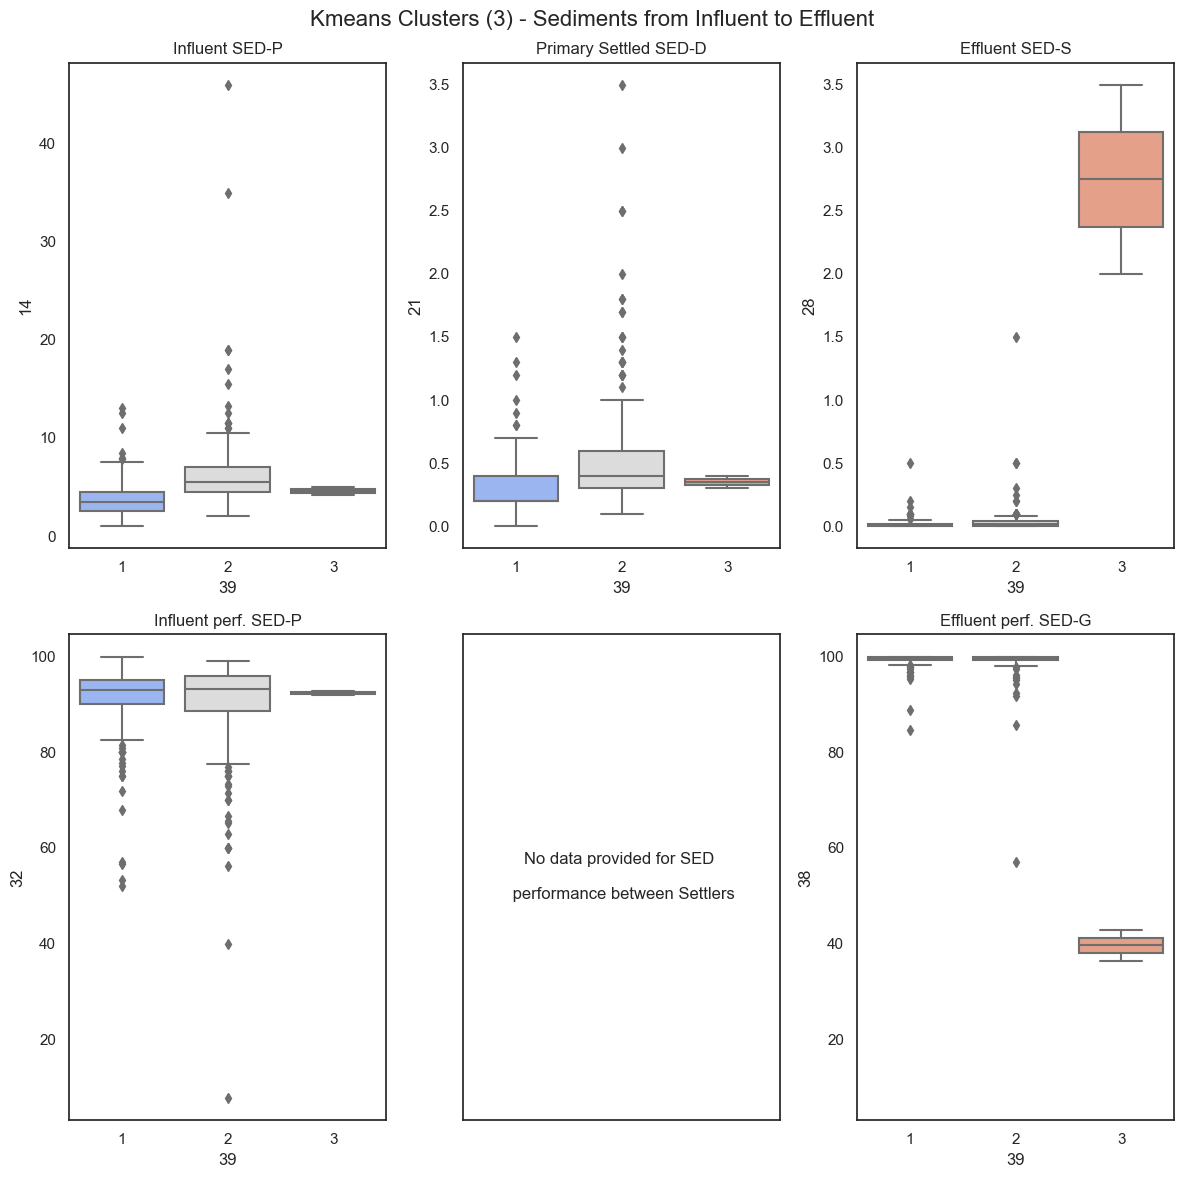

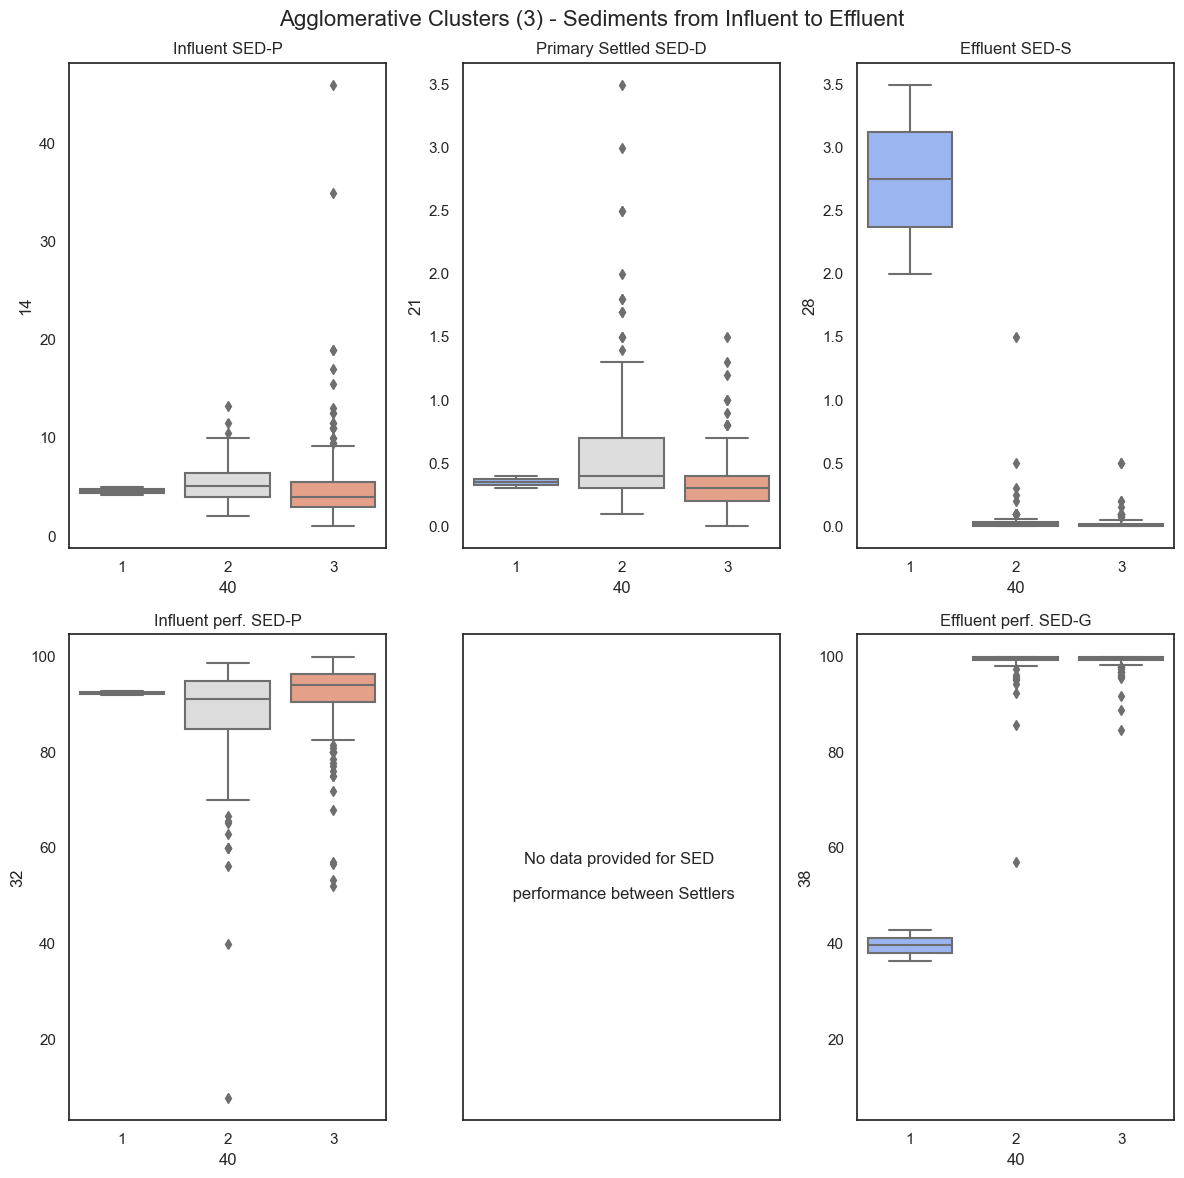

In [57]:
y_data = ['14', '21', '28', '32', '32', '38']

def fn_boxplot(x_data_id, y_data_id=0, data=df_r, palette='coolwarm'):
    return sns.boxplot(x= x_data_dict.get(x_data_id)[0],
             y= y_data[y_data_id], data=data, palette=palette)

def fn_boxplot_grid(x_data_id=39):
    fig = plt.figure(figsize=(12, 12))
    plt.rcParams['axes.grid'] = False

    sup_title = f"{x_data_dict.get(x_data_id)[1]} Clusters ({n_clusters}) - " \
    "Sediments from Influent to Effluent"
    fig_name = (sup_title.lower().replace("(","").replace(")", "").replace("-", "").replace("  ", " ").replace(" ", "_").strip())
    fig.suptitle(sup_title, fontsize=16)

    ax1 = plt.subplot(231)
    ax1.set_title("Influent SED-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 0)

    ax2 = plt.subplot(232)
    ax2.set_title("Primary Settled SED-D")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 1)

    ax3 = plt.subplot(233, sharey=ax2)
    ax3.set_title("Effluent SED-S")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 2)

    ax4 = plt.subplot(234)
    ax4.set_title("Influent perf. SED-P")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 3)

    ax5 = plt.subplot(235, xticks=[], yticks=[])
    ax5.text(0.5, 0.5, "No data provided for SED \n\n performance between Settlers", 
            horizontalalignment='center', verticalalignment='center')

    ax6 = plt.subplot(236, sharey=ax4)
    ax6.set_title("Effluent perf. SED-G")
    fn_boxplot(x_data_id = x_data_id, y_data_id = 5)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.2,
                        wspace=0.3)
    plt.tight_layout()
    plt.savefig(fig_name)
    plt.rcParams['axes.grid'] = True


fn_boxplot_grid(x_data_id = 39)
fn_boxplot_grid(x_data_id = 40)